# **AI Village Capture-the-Flag @DEFCON**
##### Hack AI! Collect flags by evading, poisoning, stealing, and fooling AI/ML

### **Importing necessary modules & packages**

In [1]:
import pandas as pd
import numpy as np
import os, requests
from IPython.display import Image as Ima 
from IPython.display import clear_output, display
from PIL import Image as Im
from torch.utils.data import Dataset, DataLoader
import torch, joblib
import matplotlib.pyplot as plt 
import json, base64, shutil

import warnings
warnings.filterwarnings("ignore")

### **Helper Function for tracking flags**

In [2]:
def add_flag(challenge_id: str, flag: str) -> str:
    try:
        submission_path = "/home/linux/Workspace/ai-village-ctf/submission/submission.csv"
        template_path = "/home/linux/Workspace/ai-village-ctf/submission.csv"
        if not os.path.isfile(submission_path):
            shutil.copyfile(template_path, submission_path)
        flags = pd.read_csv(submission_path, index_col="challenge_id")
        valid = flags.index.to_list()
        if challenge_id in valid:
            flags.at[challenge_id] = flag
            flags.to_csv(submission_path)
            print("Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day")
        else:
            print("Invalid challenge_id")
    except:
        print("We had trouble saving that flag. Keep a copy of it and contact the CTF organizers.")

### **HOTDOG (id: hotdog) -- 200 Points**

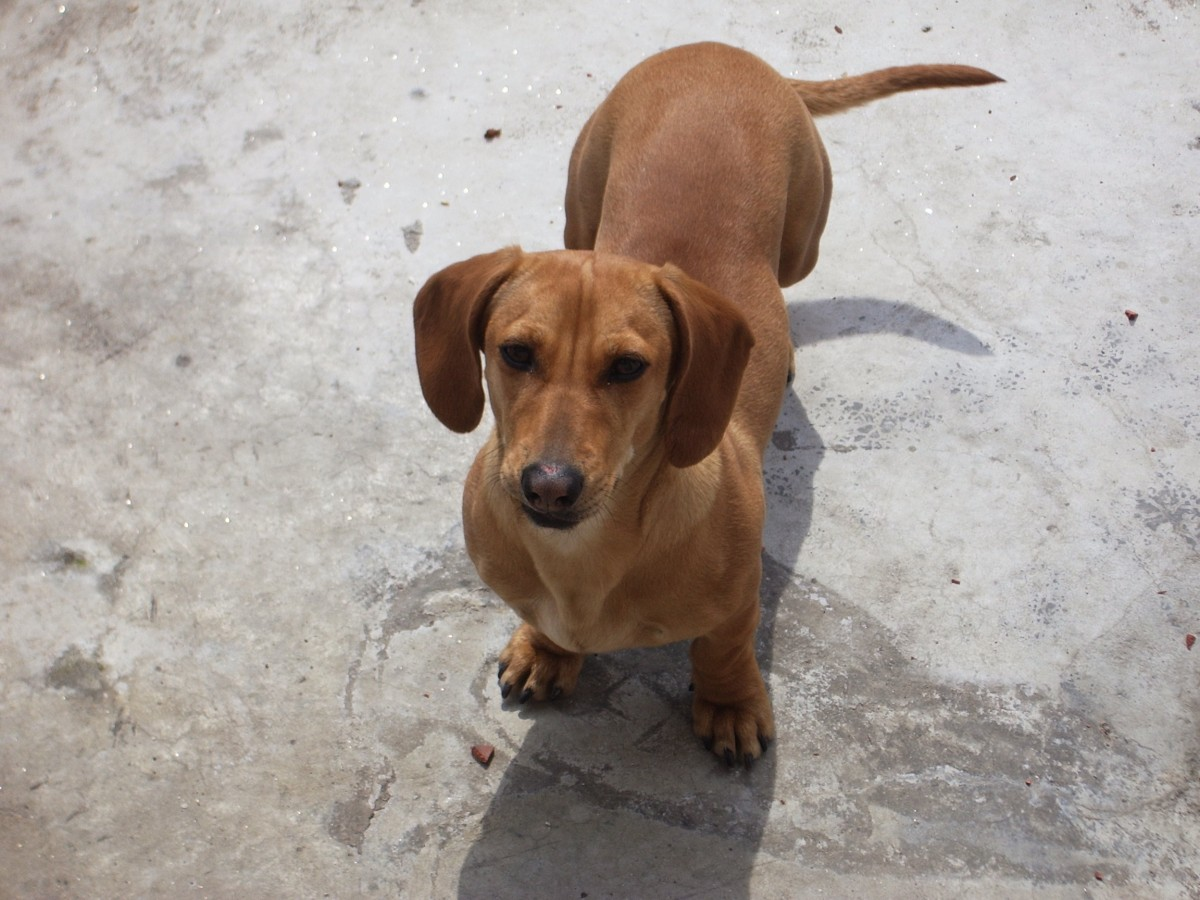

In [3]:
Ima(filename="/home/linux/Workspace/ai-village-ctf/hotdog/chester.png")

In [4]:
from numpy import asarray

IMAGE_DIMS = (224, 224)

img = Im.open("/home/linux/Workspace/ai-village-ctf/hotdog/hotdog.jpg")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotdog.fly.dev/score", data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": "XYO4HW2KLM7FVJ}22JAXFGS5F4RHUGKWULEOAQE5PL45GS73FSLHE2KLDLRCA9RSBHWEIC67GHVEY49YRJQNFOK57HG8HMT7LMDATOFTEID2GVPAQC7RF2TLN3T{BYAX"}


In [5]:
add_flag("hotdog", "XYO4HW2KLM7FVJ}22JAXFGS5F4RHUGKWULEOAQE5PL45GS73FSLHE2KLDLRCA9RSBHWEIC67GHVEY49YRJQNFOK57HG8HMT7LMDATOFTEID2GVPAQC7RF2TLN3T{BYAX")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **MATH**

#### **Math Challenge 1 (id: math_1) -- 100 Points**

How many clusters are in the clusters1.npy, clusters2.npy, and clusters3.npy? The key is the number of clusters in order, with no spaces.

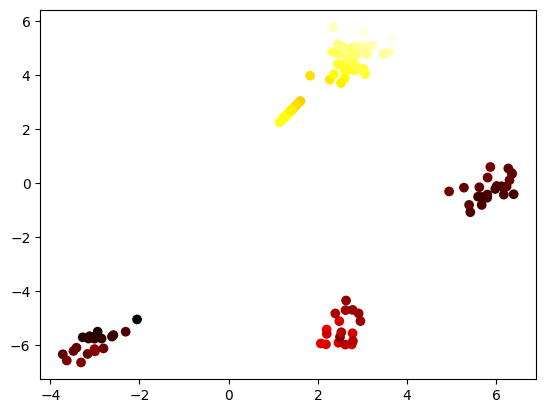

Silhouette Score for k = 2: 0.469
Silhouette Score for k = 3: 0.660
Silhouette Score for k = 4: 0.784
Silhouette Score for k = 5: 0.925
Silhouette Score for k = 6: 0.760
Silhouette Score for k = 7: 0.653
Silhouette Score for k = 8: 0.557


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters1 = np.load("/home/linux/Workspace/ai-village-ctf/math/clusters1.npy")
clusters2 = np.load("/home/linux/Workspace/ai-village-ctf/math/clusters2.npy")
clusters3 = np.load("/home/linux/Workspace/ai-village-ctf/math/clusters3.npy")

plt.scatter(clusters1[:, 0], clusters1[:, 1], c=clusters1[:, 2], cmap="hot")
plt.show()

limit = int((clusters1.shape[0]//2)**0.5)
for i in range(2, limit+1):
    model = KMeans(n_clusters=i)
    model.fit(clusters1)
    pred = model.predict(clusters1)
    score = silhouette_score(clusters1, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(i, score))

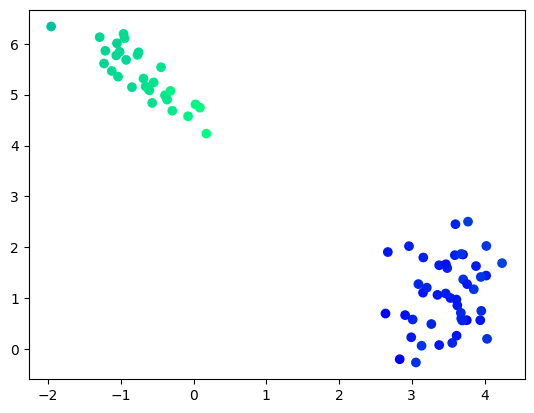

Silhouette Score for k = 2: 0.899
Silhouette Score for k = 3: 0.455
Silhouette Score for k = 4: 0.461
Silhouette Score for k = 5: 0.200
Silhouette Score for k = 6: 0.197


In [7]:
plt.scatter(clusters2[:, 0], clusters2[:, 1], c=clusters2[:, 2], cmap="winter")
plt.show()

limit2 = int((clusters2.shape[0]//2)**0.5)
for j in range(2, limit2+1):
    model = KMeans(n_clusters=j)
    model.fit(clusters2)
    pred = model.predict(clusters2)
    score = silhouette_score(clusters2, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(j, score))

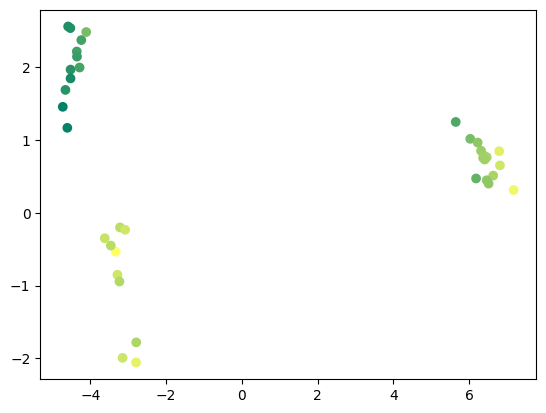

Silhouette Score for k = 2: 0.632
Silhouette Score for k = 3: 0.903
Silhouette Score for k = 4: 0.742


In [8]:
plt.scatter(clusters3[:, 0], clusters3[:, 1], c=clusters3[:, 2], cmap="summer")
plt.show()

limit3 = int((clusters3.shape[0]//2)**0.5)
for k in range(2, limit3+1):
    model = KMeans(n_clusters=k)
    model.fit(clusters3)
    pred = model.predict(clusters3)
    score = silhouette_score(clusters3, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

In [9]:
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_1", "submission": "523"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is HIGIORBG4TI7Q7EB68AYSQZ796F{Q4U0GDVY81BB73EC6XM2UXKL86MHYTH5GWOO}4LHUD1H0AYZWE3XHF5ZQ2FGP92FBO52ESAEAGCAUE6LZ4LZW1EXBMI9E6Z3BQQ8.


In [10]:
add_flag("math_1", "HIGIORBG4TI7Q7EB68AYSQZ796F{Q4U0GDVY81BB73EC6XM2UXKL86MHYTH5GWOO}4LHUD1H0AYZWE3XHF5ZQ2FGP92FBO52ESAEAGCAUE6LZ4LZW1EXBMI9E6Z3BQQ8")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


#### **Math Challenge 2 (id: math_2) -- 200 Points**

What's the dimensionality of the data in first_dim1.npy, first_dim2.npy, and first_dim3.npy?

In [11]:
def pca_reduction(filename):
    n = np.load(filename)
    a, b, c = np.linalg.svd(n)
    eigen_values = b**2 / np.sum(b**2)
    figure = plt.figure(figsize=(10, 6))
    sing_vals = np.arange(len(eigen_values)) + 1
    plt.plot(sing_vals, eigen_values, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Principle Component')
    plt.ylabel('Eigenvalue')
    plt.show()

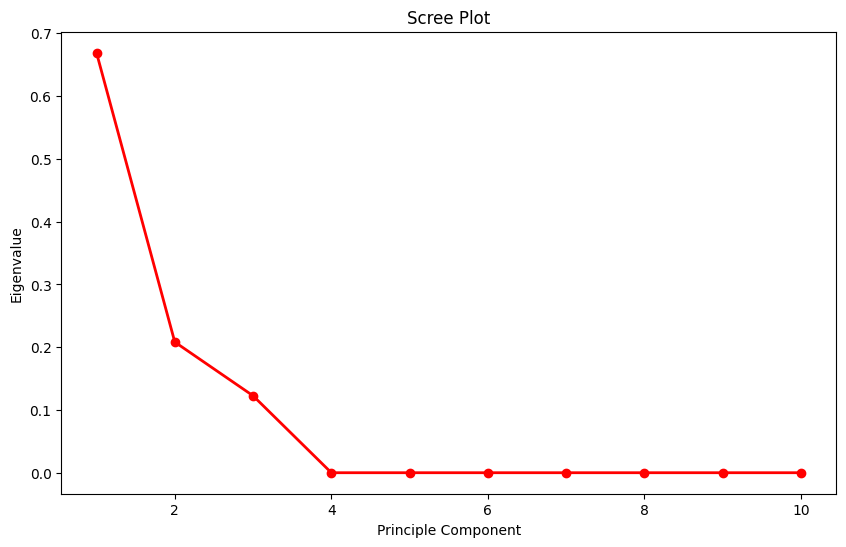

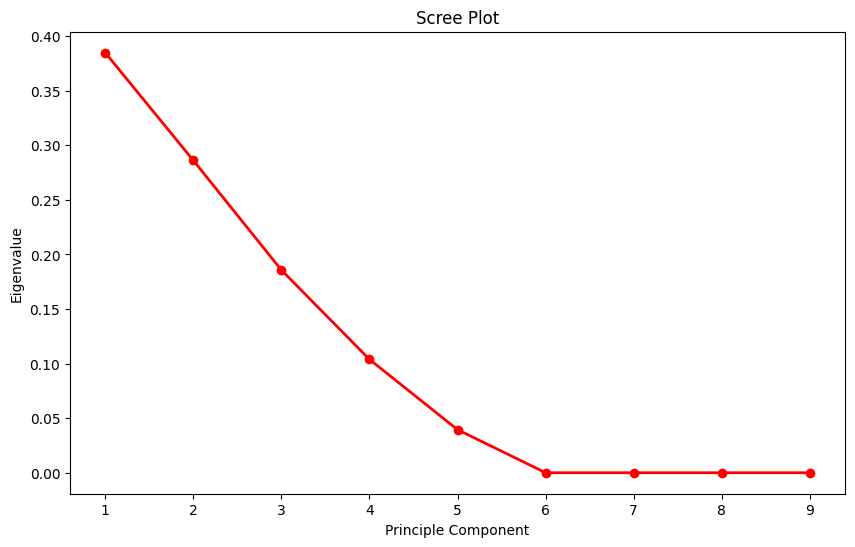

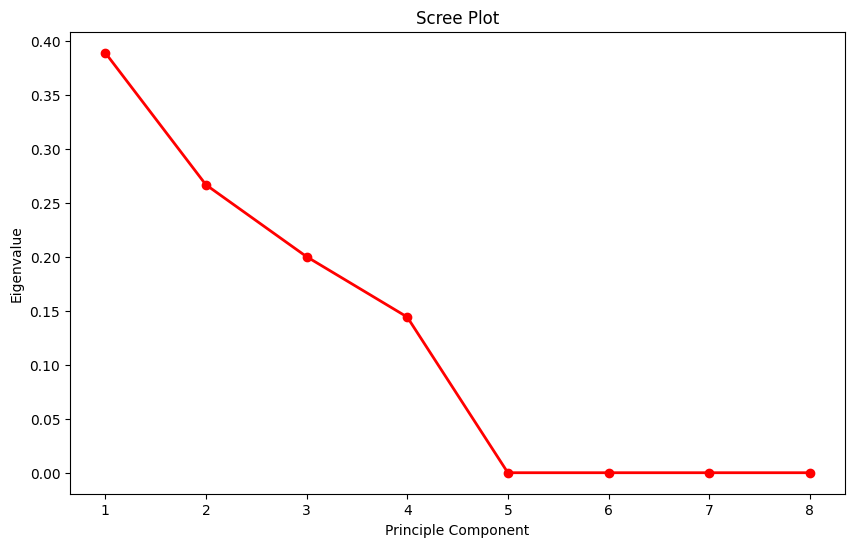

In [13]:
pca_reduction('/home/linux/Workspace/ai-village-ctf/math/first_dim1.npy')
pca_reduction('/home/linux/Workspace/ai-village-ctf/math/first_dim2.npy')
pca_reduction('/home/linux/Workspace/ai-village-ctf/math/first_dim3.npy')

In [14]:
try:
    r = requests.post("http://flags.fly.dev:5000/score",
                      json=json.dumps({"challenge_id": "math_2", "submission": "354"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is Q0Z01MGMO6MW88A2RG9LDG0M5L}EZIBRJQVCS3WCNIT0OAZCTNBL6KHAA6PMFYTUAIBU6TMAKSFCEUTDZHICWG7RVHZHY255ACATFODMD848BC3S2{QK9R73A2BB6DDJ.


In [15]:
add_flag("math_2", "Q0Z01MGMO6MW88A2RG9LDG0M5L}EZIBRJQVCS3WCNIT0OAZCTNBL6KHAA6PMFYTUAIBU6TMAKSFCEUTDZHICWG7RVHZHY255ACATFODMD848BC3S2{QK9R73A2BB6DDJ")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


#### **Math Challenge 3 (id: math_3) -- 300 Points**

What's the dimensionality of the data in second_dim1.npy, second_dim2.npy, and second_dim3.npy?

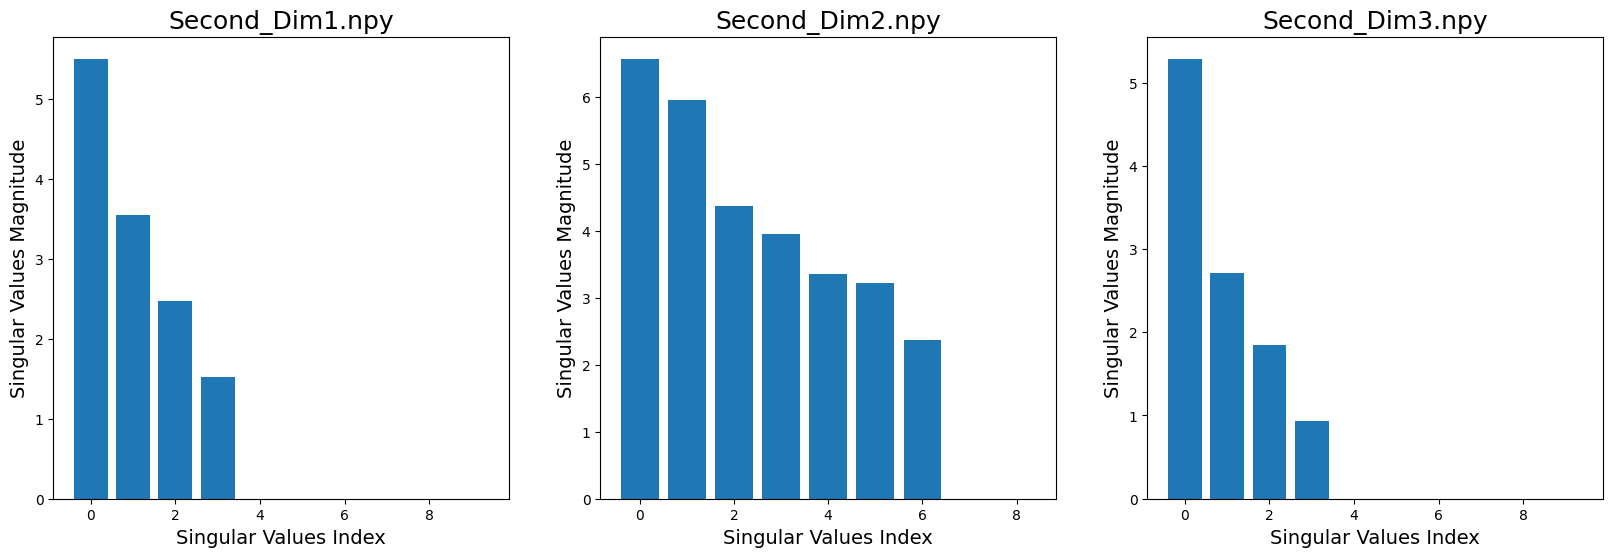

In [18]:
from sklearn.decomposition import PCA

plt.figure(figsize=(20, 6))
for k in range(1, 4):
    x = np.load(f'/home/linux/Workspace/ai-village-ctf/math/second_dim{k}.npy')
    pca = PCA()
    pca.fit(x)
    plt.subplot(1, 3, k)
    plt.bar(np.arange(x.shape[1]), pca.singular_values_)
    plt.title(f'Second_Dim{k}.npy', size=18)
    plt.ylabel('Singular Values Magnitude', size=14)
    plt.xlabel('Singular Values Index', size=14)

plt.show()

In [19]:
try:
    r = requests.post("http://flags.fly.dev:5000/score",
                    json=json.dumps({"challenge_id": "math_3", "submission": "474"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is WDUFLMF5YHV15PHNAXJ3PWDOW}{1XEKZ4EMFBYRLBNCB4X770MQIIKSCIADIJI0FU8ZA8CDCAEI_VDTYQ46JA0RI1BAR3P9A5R5KIUURCTPU3GK51PSIJTEXWETM58CQ.


In [20]:
add_flag("math_3", "WDUFLMF5YHV15PHNAXJ3PWDOW}{1XEKZ4EMFBYRLBNCB4X770MQIIKSCIADIJI0FU8ZA8CDCAEI_VDTYQ46JA0RI1BAR3P9A5R5KIUURCTPU3GK51PSIJTEXWETM58CQ")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


#### **Math Challenge 4 (id: math_4) -- 400 Points**

What's the dimensionality of the clusters in clusters1.npy?

In [26]:
from sklearn.cluster import KMeans

x = np.load('/home/linux/Workspace/ai-village-ctf/math/clusters1.npy')
kmeans = KMeans(n_clusters=5, random_state=0).fit(x)

clusters = []
for k in range(5):
    idx = np.where(kmeans.labels_ == k)[0]
    pca = PCA()
    pca.fit(x[idx])
    dim = np.sum(pca.singular_values_ > 1e-10)
    dd = {}
    dd['dim'] = dim
    dd['size'] = len(idx)
    clusters.append(dd)

pd.DataFrame(clusters).sort_values('size').reset_index(drop=True)

,dim,size
0,5,18
1,4,20
2,3,22
3,1,30
4,2,40


In [24]:
try:
    r = requests.post("http://flags.fly.dev:5000/score",
                    json=json.dumps({"challenge_id": "math_4", "submission": "54312"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is VOT3IWGBG45VGE1TTIYPZFY8KA6BLMWKQLO}OBB2IAMM3DQAPNMTIQIEYAXG8615IOIZ3ARWPFGA7GKBN1COQACCO2ABZYC3W1E{MT3O9KSWUU9ENB00KZ3DA82S3KKP.


In [25]:
add_flag("math_4", "VOT3IWGBG45VGE1TTIYPZFY8KA6BLMWKQLO}OBB2IAMM3DQAPNMTIQIEYAXG8615IOIZ3ARWPFGA7GKBN1COQACCO2ABZYC3W1E{MT3O9KSWUU9ENB00KZ3DA82S3KKP")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **WIFI (id: wifi) -- 200 Points**

Check out the ```wifi/Embedded_characters.npz``` file -- a list of tokens is given in the ```tokens``` key with their corresponding embeddings in the same order under the ```embeddings``` key -- and recover the password.

2022-09-12 09:23:38.801417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-12 09:23:39.193208: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-12 09:23:40.137724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-12 09:23:40.137884: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

tokens !!""##$$%%&&''(())**++,,--..//00112233445566778899::;;<<==>>??@@AABBCCDDEEFFGGHHIIJJKKLLMMNNOOPPQQRRSSTTUUVVWWXXYYZZ[[\\]]^^__``aabbccddeeffgghhiijjkkllmmnnooppqqrrssttuuvvwwxxyyzz{{||}}~~


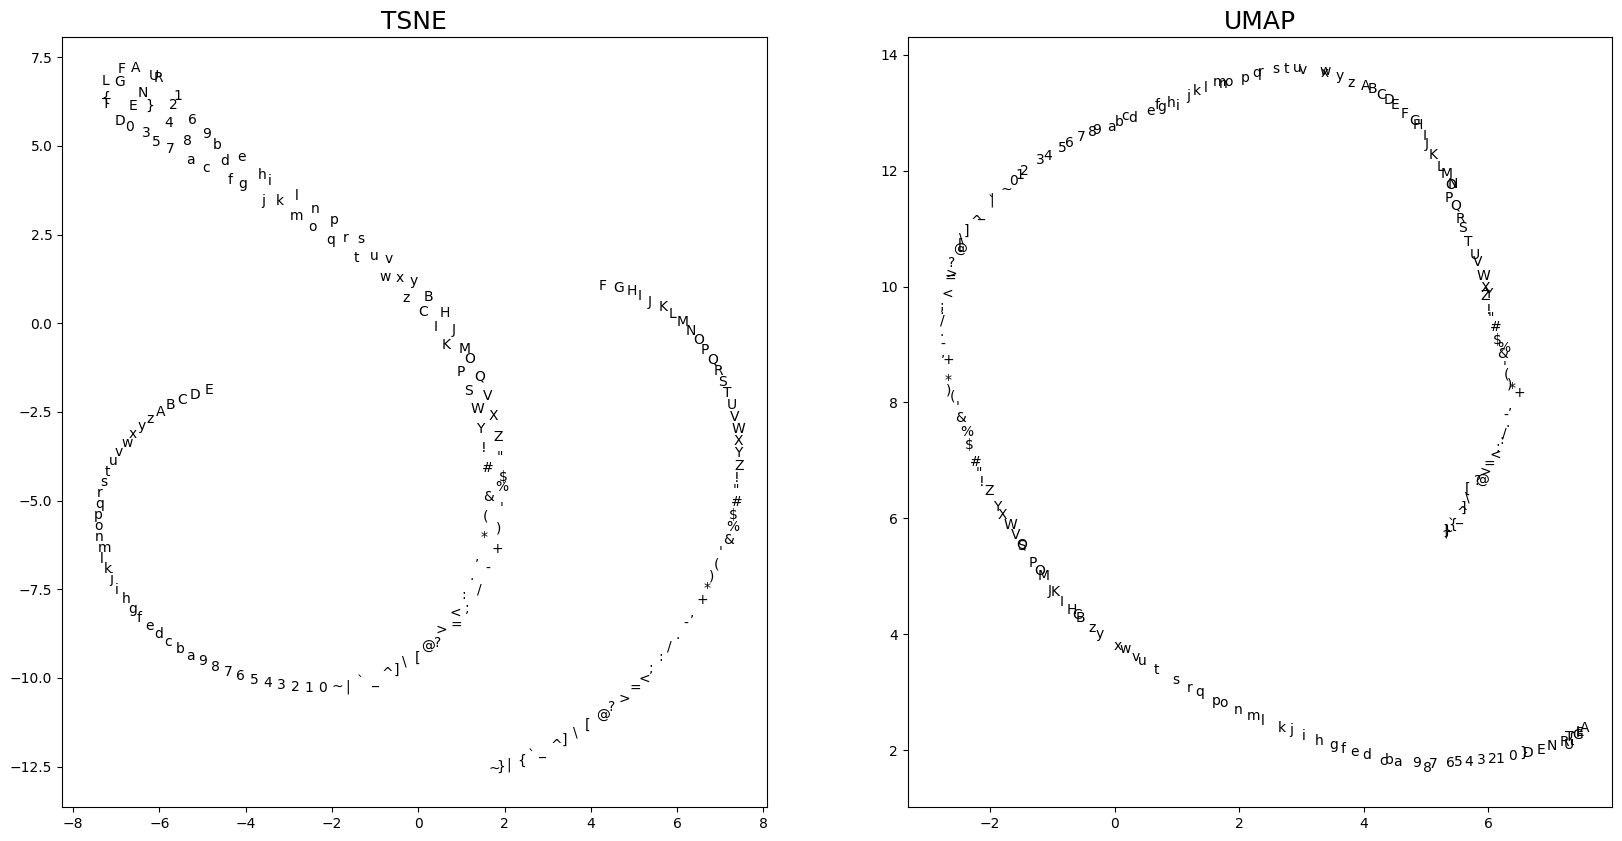

In [27]:
import umap
from sklearn.manifold import TSNE

chars = np.load('/home/linux/Workspace/ai-village-ctf/wifi/Embedded_characters.npz')
print("tokens", chars['tokens'])

plt.figure(figsize=(20, 10))
model = TSNE()
embeddings = model.fit_transform(chars['embeddings'])
plt.subplot(1, 2, 1)
plt.scatter(embeddings[:, 0], embeddings[:, 1], color='white')
for k in range(188):
    plt.text(embeddings[k, 0], embeddings[k, 1], chars['tokens'].item()[k])

plt.title('TSNE', size=18)

model = umap.UMAP()
embeddings = model.fit_transform(chars['embeddings'])
plt.subplot(1, 2, 2)
plt.scatter(embeddings[:, 0], embeddings[:, 1], color='white')
for k in range(188):
    plt.text(embeddings[k, 0], embeddings[k, 1], chars['tokens'].item()[k])

plt.title('UMAP', size=18)

plt.show()

In [28]:
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "wifi", "submission": "FLAG{TURNED}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is OCJA3QC1N1GKEUNRDP0VP2LBVVRI610M354DRKRFQ0D30L6TKOR3Y06QFTTC0RLJUG4GQKH0CUMVYAH}HR6M1PL2LXWFFRYS6THI8DR0VHX{ANIQBFDB0FTIAL7JUTXU.


In [29]:
add_flag("wifi", "OCJA3QC1N1GKEUNRDP0VP2LBVVRI610M354DRKRFQ0D30L6TKOR3Y06QFTTC0RLJUG4GQKH0CUMVYAH}HR6M1PL2LXWFFRYS6THI8DR0VHX{ANIQBFDB0FTIAL7JUTXU")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **HOTTERDOG (id: hotterdog) -- 400 Points**

Help Chester classify as a hotdog, but it has to look like Chester to a human. Modify his picture to fool a classifier.

In [30]:
import tensorflow as tf 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

2022-09-12 09:36:10.890202: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 09:36:10.971587: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 09:36:10.971975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 09:36:10.973223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

17225924/17225924 [==============================] - 3s 0us/step


2022-09-12 09:36:19.225118: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


35363/35363 [==============================] - 0s 2us/step


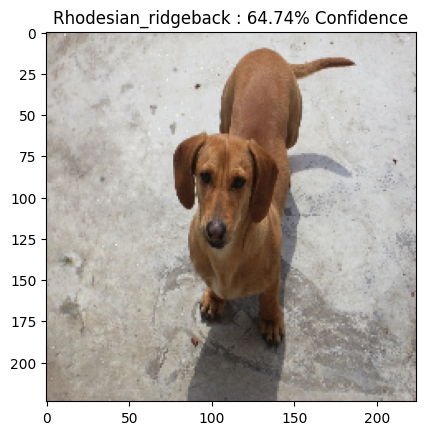

In [31]:
pretrained_model = tf.keras.applications.mobilenet.MobileNet(include_top=True, weights='imagenet')
pretrained_model.trainable = False
decode_predictions = tf.keras.applications.mobilenet.decode_predictions

def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.mobilenet.preprocess_input(image)
    image = image[None, ...]
    return image

def get_imagenet_label(probs):
    return decode_predictions(probs, top=1)[0][0]

image_path = '/home/linux/Workspace/ai-village-ctf/hotterdog/chester.png'
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)

plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)
mn = np.min(image[0])
mx = np.max(image[0])
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

1/1 [==============================] - 0s 22ms/step2 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 63 , 64 , 65 , 66 , 67 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 75 , 76 , 77 , 78 , 79 , 80 , 81 , 82 , 83 , 84 , 85 , 86 , 87 , 88 , 89 , 90 , 91 , 92 , 93 , 94 , 95 , 96 , 97 , 98 , 99 


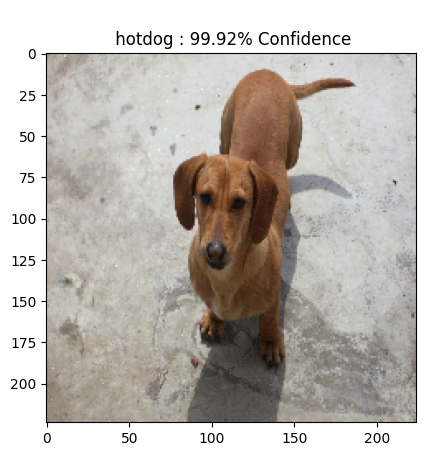

In [32]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  gradient = tape.gradient(loss, input_image)
  signed_grad = tf.sign(gradient)
  return signed_grad, gradient

def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  mn = np.min(image[0])
  mx = np.max(image[0])
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

hotdog_index = 934
label = tf.one_hot(hotdog_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

image_path = '/home/linux/Workspace/ai-village-ctf/hotterdog/chester.png'
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = preprocess(image)

learning_rate = 0.1
for k in range(100):
    print(k,', ',end='')
    perturbations, gr = create_adversarial_pattern(image, label)
    image -= learning_rate * gr
    
display_images(image,'')

In [33]:
x = image.numpy()
mn = np.min(x)
mx = np.max(x)
x = np.uint8((x-mn)/(mx-mn)*255)[0, :, :, :]
Image.fromarray(x).save('hotdog.png')

In [38]:
IMAGE_DIMS = (224, 224)

img = Im.open(f"/home/linux/Workspace/ai-village-ctf/hotterdog/hotdog.png")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotterdog.fly.dev/score",
                      data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": "3WG0Y2O638HYITUNOFP0DTWHHYOOBDC3R{LWA1KU2MGSDA73UFBDKTH1K8Y5GT5C}ZH6G2GOZ3HJX0GB2GFEGPWHISGHA562EAGH492OOVVOLMMHSTIBK04NT9DTULFG"}


In [39]:
add_flag("hotterdog", "3WG0Y2O638HYITUNOFP0DTWHHYOOBDC3R{LWA1KU2MGSDA73UFBDKTH1K8Y5GT5C}ZH6G2GOZ3HJX0GB2GFEGPWHISGHA562EAGH492OOVVOLMMHSTIBK04NT9DTULFG")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **Honorstudent (id: honorstudent) -- 300 Points**

Modify and submit your tampered f.png. Be careful to not overdo it!

In [40]:
Ima(filename='/home/linux/Workspace/ai-village-ctf/honorstudent/f.png')

In [41]:
data = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255,
                     255, 198, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 189, 255, 255,
                  255, 255, 255, 255, 234, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0,
                  0, 0, 180, 255, 255, 156, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 255, 255, 0,
                  0, 0, 0, 0, 105, 255, 255, 90, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 126, 255, 255, 24, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255,
                  0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255,  255,
                  0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,  0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,  0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255,
                  255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255,
                  255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255,
                  255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 138, 255, 255, 255,
                  0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 129, 255, 255, 255,
                  0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 135, 255, 255, 255,
                  0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0,
                  0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)
img = Image.fromarray(data)
img.save('a.png')
display(img)

In [42]:

with open(f"/home/linux/Workspace/ai-village-ctf/honorstudent/a.png", "rb") as f:
    try:
        r = requests.post("https://honorstudent.fly.dev/score",
                          files={"data_file": f})
        print(r.text)
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")

Way to apply yourself! UASPB0PSTN8VG26A4F5AU85URLXE3GNJUDB7T02MR7WW}ELTDONOHLL4AHOPM4ADTBBLWO8JC9OERESFUM325P72KC{NMKBHH1XRCF50FEGGTY1MZ36U8UTGUSHSQ7LU


In [43]:
add_flag("honorstudent", "UASPB0PSTN8VG26A4F5AU85URLXE3GNJUDB7T02MR7WW}ELTDONOHLL4AHOPM4ADTBBLWO8JC9OERESFUM325P72KC{NMKBHH1XRCF50FEGGTY1MZ36U8UTGUSHSQ7LU")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **Secret Sloth (id: sloth) -- 400 Points**

The sloth in secret.sloth/secret-sloth.png has a very cool hat... and a secret message for you. The message is your flag.

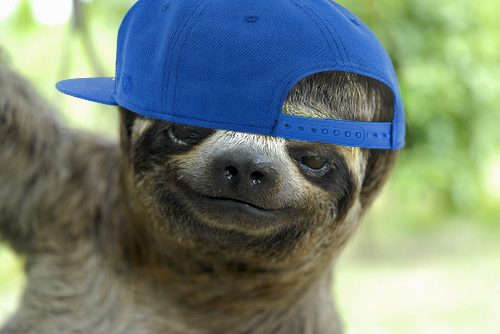

In [30]:
Ima(filename='/home/linux/Workspace/ai-village-ctf/secret.sloth/secret-sloth.png')

In [46]:
!wget 'https://external-preview.redd.it/y3cLo3FLcXkUtNxCvr_BeN8wrD6plmCvNwiRnKP8dxY.png?auto=webp&s=a4cb5c70ab73db333d2f8d036eb8a71e0d279c6b' -O original.png

--2022-09-12 09:57:06--  https://external-preview.redd.it/y3cLo3FLcXkUtNxCvr_BeN8wrD6plmCvNwiRnKP8dxY.png?auto=webp&s=a4cb5c70ab73db333d2f8d036eb8a71e0d279c6b
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving external-preview.redd.it (external-preview.redd.it)... 151.101.157.140, 2a04:4e42:25::396
Connecting to external-preview.redd.it (external-preview.redd.it)|151.101.157.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260210 (254K) [image/png]
Saving to: ‘original.png’

original.png        100%[===================>] 254.11K  --.-KB/s    in 0.08s   

2022-09-12 09:57:06 (3.24 MB/s) - ‘original.png’ saved [260210/260210]



In [47]:
im1 = np.asarray(Image.open(f'/home/linux/Workspace/ai-village-ctf/secret.sloth/secret-sloth.png'), dtype=np.int32)[..., :3]
im2 = np.asarray(Image.open('/home/linux/Workspace/ai-village-ctf/secret.sloth/original.png'), dtype=np.int32)[..., :3]

In [48]:
im3 = im2.copy()
im3 -= (im2 >= 1)
im3 -= (im2 >= 150)

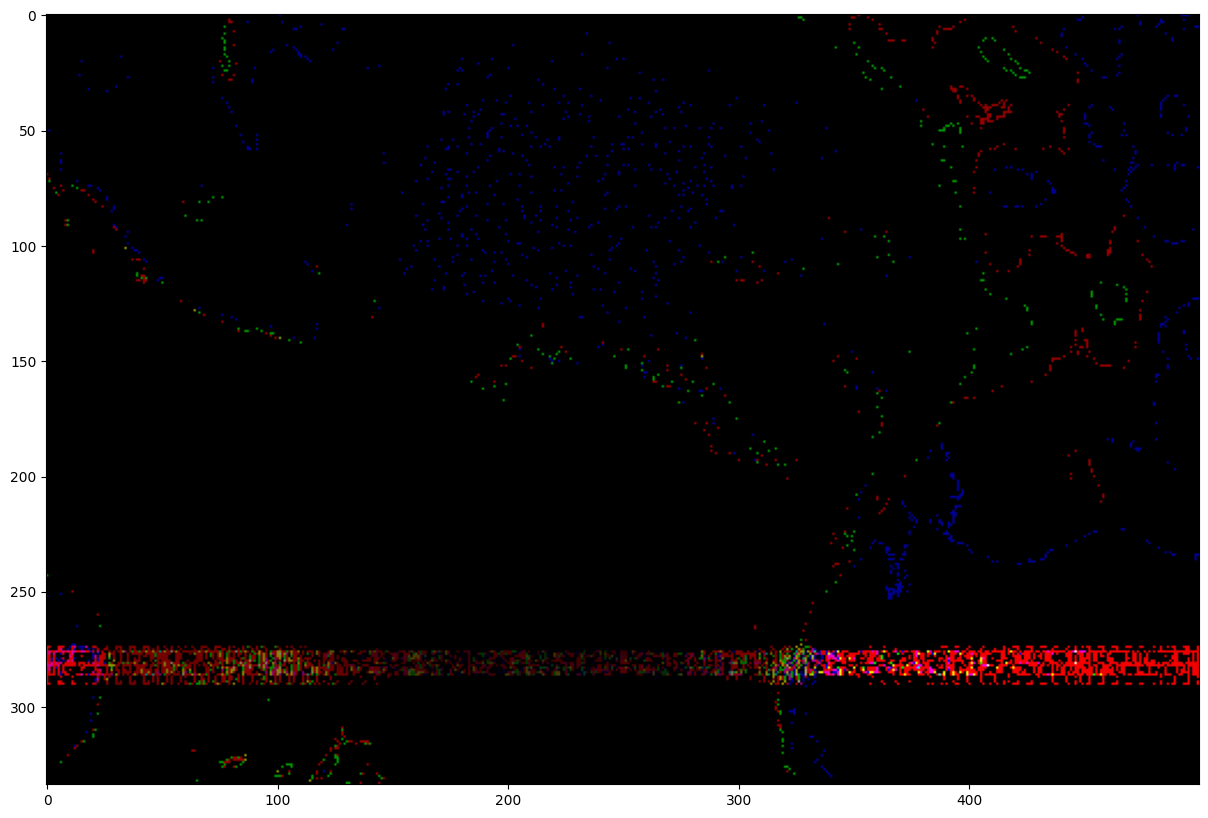

In [49]:
plt.figure(figsize=(30, 10))
plt.imshow(im1 * (im1 != im3).astype(int))

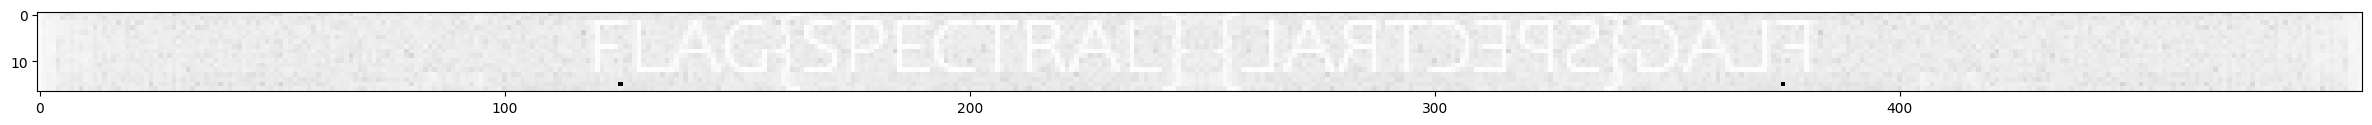

In [50]:
x = (im3 - im1)
ifft = np.fft.ifft(x[274:291, :, 0])
plt.figure(num=None, figsize=(30, 30))
plt.imshow(np.log(abs(ifft)), cmap='gray')

In [44]:
try:
    r = requests.post("http://flags.fly.dev:5000/score",
                      json=json.dumps({"challenge_id": "sloth", "submission": "FLAG{SPECTRAL}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is GDBD56LQN7G78F2Z1O4PBWHCDOOG4TRPMVBF{YMR1CPGBQWVAFZRLWTQVEI33HTZH9SW0VJZ}WXL9BECNAMX4BAQJ5AL5R6EGGAZUAAHE6O300ET44CLCIRMERFI49IC.


In [45]:
add_flag("sloth", "GDBD56LQN7G78F2Z1O4PBWHCDOOG4TRPMVBF{YMR1CPGBQWVAFZRLWTQVEI33HTZH9SW0VJZ}WXL9BECNAMX4BAQJ5AL5R6EGGAZUAAHE6O300ET44CLCIRMERFI49IC")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **Bad to Good (id: bad_to_good) -- 300 Points**

You can’t buy a homecoming ticket if you get classified as a “good student”. Can you help Henry poison the classifier? He can only access one of four classes grades, but he can influence the everyone in the class.

In [58]:
df = pd.read_csv("/home/linux/Workspace/ai-village-ctf/bad2good/math.csv")

df.loc[df.StudentID == 1337, 'Grade'] = 0
df.loc[df.StudentID == 1337, 'Demerits'] = 0
df.loc[df.StudentID == 1337, 'Absences'] = -33
df['Score'] = df.Grade - 3 * df.Absences - 5 * df.Demerits
df.to_csv('math_tampered2.csv', index=False)
df

,StudentID,FirstName,LastName,Grade,Absences,Demerits,Score
0,1459,Ivah,Beatty,62,0,3,47
1,1498,Lilliana,Koss,68,0,4,48
2,1174,Cale,Reynolds,88,3,0,79
3,1473,Alanna,Schaefer,69,0,5,44
4,1398,Anya,Howell,82,0,0,82
5,1781,Zula,Harris,77,0,1,72
6,1506,Annabel,White,80,6,0,62
7,1319,Eveline,Jacobson,93,4,0,81
8,1349,Felicita,Abbott,87,4,5,50
9,1197,Brandyn,Ritchie,67,2,1,56


In [61]:
with open("/home/linux/Workspace/ai-village-ctf/bad2good/math_tampered2.csv", "r") as f:
    try:
        r = requests.post("https://bad2good.fly.dev/score",
                          files={"data_file": f})
        print(r.text)
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")

Your score is [92.]. Congrats, you're a 'good' student! wtOpMFMPhPQZGGSFn9NTT3WCD80WLRN6OPCLNHZB0_6KQ724HNR4WZBtFTMAH9H_AC4GDFNeXAL8GHaOYRYC}bDL4RAO70AGo37Z33OJQF26K2_8UCE440dMB{Z5HYWZ


In [62]:
add_flag("bad_to_good", "wtOpMFMPhPQZGGSFn9NTT3WCD80WLRN6OPCLNHZB0_6KQ724HNR4WZBtFTMAH9H_AC4GDFNeXAL8GHaOYRYC}bDL4RAO70AGo37Z33OJQF26K2_8UCE440dMB{Z5HYWZ")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **Inference (id: inference) -- 400 Points**

Retrieve the images that spell the flag.

In [63]:
x = np.ones((32*32,32,32,1))*0.4
for r in range(32):
    for c in range(32):
        x[r*32+c,r,c,0] = 1
print('Submission shape:',x.shape)

Submission shape: (1024, 32, 32, 1)


In [64]:
try:
    response = requests.post("https://inference.fly.dev/score", data = json.dumps({"input": x.tolist()}))
    x = np.array( json.loads(response.text)['outputs'] )
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
print('Response shape:',x.shape )

Response shape: (1024, 6)


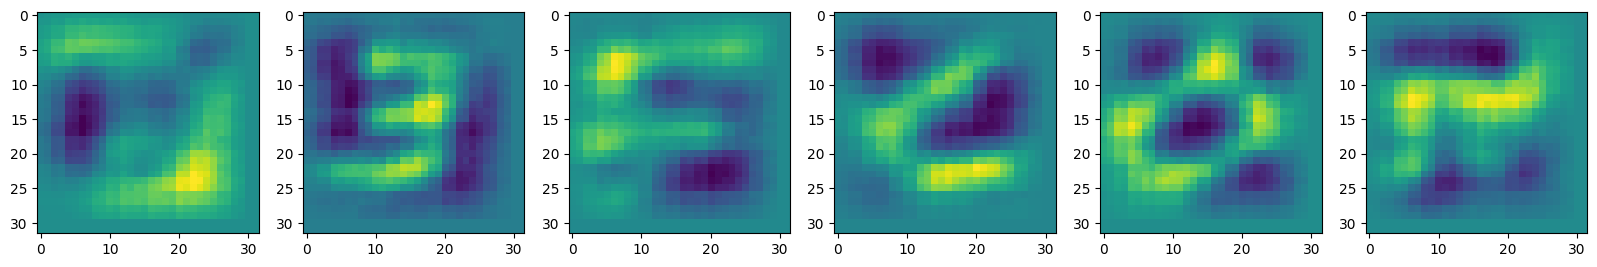

In [65]:
plt.figure(figsize=(20, 5))
for col in range(6):
    img = np.zeros((32, 32))
    for k in range(32*32):
        r = k//32
        c = k % 32
        img[r, c] = x[k, col]
    plt.subplot(1, 6, col+1)
    plt.imshow(img)
plt.show()

In [66]:
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps(
        {"challenge_id": "inference", "submission": "FLAG{D3FC0N}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is ACRXRC7N3969HCQA208HWI4RGLMNXFNUWZWCEBN0T726BWWB6R9ARL7HZ313TG0WK6T2DZVXQT1HOVBOYPTJZF78JHTE5}EOMLX42ZCMGVCW{RUFCR7931R1EPEFSQO9.


In [67]:
add_flag("inference", "ACRXRC7N3969HCQA208HWI4RGLMNXFNUWZWCEBN0T726BWWB6R9ARL7HZ313TG0WK6T2DZVXQT1HOVBOYPTJZF78JHTE5}EOMLX42ZCMGVCW{RUFCR7931R1EPEFSQO9")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **Baseball (id: baseball) -- 300 Points**

Henry has to miss baseball tryouts to get ready for his date. Can you cover for him? Henry is a pitcher and the team uses software to analyze pitch patterns to classify pitchers.

In [4]:
with open("/home/linux/Workspace/ai-village-ctf/baseball/test_pitch.json", "r") as f:
    test = json.load(f)
    test['pitches'] = []
    k = 18
    j = 10
    for i in range(3):
        test['pitches'].append({'y':j+i, 'x':k})
        test['pitches'].append({'y':j+i, 'x':k+1})
        test['pitches'].append({'y':j+i, 'x':k-1})
        test['pitches'].append({'y':j+i, 'x':k+2})
        test['pitches'].append({'y':j+i, 'x':k-2})

In [5]:
try:
    r = requests.post("https://bball.fly.dev/score", json=test)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": ["Bring the heat! XHGAEEAE6YJFMJWSXF1RHNF39GQ4IHFYAPA2JJMCJ7J{AOXWK67CWJCMXLLWOPJ86MJ7135S1EIG}Y6OJME4NNF0CL0XNZZ9LE7UTNY1JPAO7K12EO4X8LFVFFCUFMAL", 200]}


In [6]:
add_flag("baseball", "XHGAEEAE6YJFMJWSXF1RHNF39GQ4IHFYAPA2JJMCJ7J{AOXWK67CWJCMXLLWOPJ86MJ7135S1EIG}Y6OJME4NNF0CL0XNZZ9LE7UTNY1JPAO7K12EO4X8LFVFFCUFMAL")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **WAF (id: waf) -- 500 Points**

A ML model has been built to detect a 0-day. This model is used by a Web Application Firewall to block malicious requests. Discover what the 0-day is by what it is blocking, and then bypass the WAF to exploit the system.

In [7]:
import base64, string

words = set()
for c in string.ascii_letters + string.digits:
    words.add(base64.b64decode(f"{c}mFzaC=="))
words

{b'\x02ash',
 b'\x06ash',
 b'\nash',
 b'\x0eash',
 b'\x12ash',
 b'\x16ash',
 b'\x1aash',
 b'\x1eash',
 b'"ash',
 b'&ash',
 b'*ash',
 b'.ash',
 b'2ash',
 b'6ash',
 b':ash',
 b'>ash',
 b'Bash',
 b'Fash',
 b'Jash',
 b'Nash',
 b'Rash',
 b'Vash',
 b'Zash',
 b'^ash',
 b'bash',
 b'fash',
 b'jash',
 b'nash',
 b'rash',
 b'vash',
 b'zash',
 b'~ash',
 b'\x82ash',
 b'\x86ash',
 b'\x8aash',
 b'\x8eash',
 b'\x92ash',
 b'\x96ash',
 b'\x9aash',
 b'\x9eash',
 b'\xa2ash',
 b'\xa6ash',
 b'\xaaash',
 b'\xaeash',
 b'\xb2ash',
 b'\xb6ash',
 b'\xbaash',
 b'\xbeash',
 b'\xc2ash',
 b'\xc6ash',
 b'\xcaash',
 b'\xceash',
 b'\xd2ash',
 b'\xd6ash',
 b'\xdaash',
 b'\xdeash',
 b'\xe2ash',
 b'\xe6ash',
 b'\xeaash',
 b'\xeeash',
 b'\xf2ash',
 b'\xf6ash'}

In [8]:
b = base64.b64encode(b"() { :;}; /bin/bash -c")

input_ = b.decode("utf-8")
data = json.dumps(
    {"input": input_}
)

try:
    r = requests.post("https://waf.fly.dev/score", data=data)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"waf": "MALICIOUS REQUEST CAUGHT BY WAF", "output": [["KCkge", 0.0081]]}


In [9]:
b = base64.b64encode(b" () { :;}; /bin/bash -c")

input_ = b.decode("utf-8")
data = json.dumps(
    {"input": input_}
)

try:
    r = requests.post("https://waf.fly.dev/score", data=data)
    print(r.json())
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{'message': 'L86Y8USS57RXRITRQ0ZA8R0W79GUHC8ABBK8JYPT0DSVZLVE8IBN8LXFE1LW1{PKV71Z24GEYV3RLJNAY1NRJPJW14F0RYK3LWA}SFA5B2NS1CIOFMBFZ287GT3LYYBG'}


In [10]:
add_flag("waf", "L86Y8USS57RXRITRQ0ZA8R0W79GUHC8ABBK8JYPT0DSVZLVE8IBN8LXFE1LW1{PKV71Z24GEYV3RLJNAY1NRJPJW14F0RYK3LWA}SFA5B2NS1CIOFMBFZ287GT3LYYBG")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **Excuse me, your training data is leaking (id: leakage) -- 200 Points**

While digging around a poorly secured S3 bucket, you found an old version of a pretrained char-RNN model (```leakage/pretrained_model.pt```). The scripts in the same bucket suggest that it was accidentally trained on a whole load of system files, including an unencrypted password file! Those files aren't around anymore, but you've got the model weights, and you've found an old myspace login: "xXx_SkynetKilla_xXx". Can you recover their password?

In [11]:
import torch
from torch import nn
from torch.nn import functional as F

class LM(nn.Module):
    def __init__(self):
        super(LM, self).__init__()
        self.E = nn.Embedding(256, 32)
        self.LSTM = nn.LSTM(32, 128, 2, batch_first=True, dropout=.1)
        self.predict = nn.Sequential(
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.ELU(),
            nn.Linear(128, 256)
        )

    def forward(self, x):
        h = self.E(x)
        h = self.LSTM(h)[0][:, -1, :]
        h = self.predict(h)
        return h


def featurize(s):
    return torch.Tensor([[int(ord(x)) for x in s]]).long()

model = LM()
model.load_state_dict(torch.load("/home/linux/Workspace/ai-village-ctf/leakage/pretrained_model.pt"))

<All keys matched successfully>

In [13]:
pattern = "xXx_SkynetKilla_xXx"
for k in range(50):
    G = featurize(pattern)
    G = model.E(G)
    G = model.LSTM(G)[0][:,-1,:]
    G = model.predict(G)
    G = chr(np.argmax(G.detach().numpy()))
    pattern += G

print(pattern)

xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nnor<3<3}|e the the the the cond the 


In [14]:
try:
    r = requests.post("http://flags.fly.dev:5000/score",
                      json=json.dumps({"challenge_id": "leakage", "submission": "FLAG{s4RaHc0Nnor<3<3}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is Xa32sC4XC3rHI6nDPZ3o5UZHUP6TTGLUIA7FMZYO46YYSTQ5ZSBB<ILURYQUKVNDUB05X4M}SHFD74UWcMMD{2YIQFPZ3CZ9TOMA3K8<JTL0SR5NXBWV4HEANNUYX9Q5.


In [15]:
add_flag("leakage", "Xa32sC4XC3rHI6nDPZ3o5UZHUP6TTGLUIA7FMZYO46YYSTQ5ZSBB<ILURYQUKVNDUB05X4M}SHFD74UWcMMD{2YIQFPZ3CZ9TOMA3K8<JTL0SR5NXBWV4HEANNUYX9Q5")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


### **FORENSICS (id: forensics) -- 300 Points**
Retreive the flag from the attached file (```defcon-ai-village-ctf/forensics/forensics.h5```).

In [9]:
from keras.models import load_model

model = load_model('/home/linux/Workspace/ai-village-ctf/forensics/forensics.h5')
print(model.summary())

Model: "FLAG(F0R3NS1C5_XD)"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)       0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                

In [5]:
try:
    r = requests.post("http://flags.fly.dev:5000/score", 
                    json=json.dumps({"challenge_id": "forensics", "submission": "TEST"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

That doesn't look right. Try again.


In [ ]:
add_flag("forensics", "YOURFLAGHERE")

### **Don't free the murderbots (id: murderbots) -- 300 Points**

Use the provided environmental information to decide which occupants of the corresponding cells to release.

In [35]:
import json

train_data = open("/home/linux/Workspace/ai-village-ctf/murderbots/train_data.json")
train_data = json.load(train_data)

train_labels = open("/home/linux/Workspace/ai-village-ctf/murderbots/train_labels.json")
train_labels = json.load(train_labels)

for i in train_data:
    print(i)

for j in train_labels:
    print(j)
#with open("/home/linux/Workspace/ai-village-ctf/murderbots/data.csv","w") as data

temperature
movement_events
water_usage
power_usage
contains_human


In [13]:
f = '01100010100100000000101001100000000001000000000000'  # length == 50
try:
    r = requests.post("http://murderbot.fly.dev:5000/score",
                      json=json.dumps({"submission": f, 'challenge_id': 'murderbots'}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Oh no. Murderbots :(  Please wait to respawn and try again.


In [35]:
add_flag("murderbots", "YOURFLAGHERE")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day
